# Seaborn

In [48]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Using a nuit in dataset in seaborn
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Distribution plots

## Distplot

c:\users\dti digital\desktop\studies\datasciencecourse\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

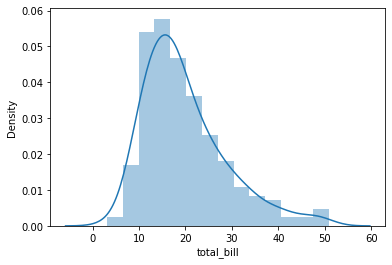

In [5]:
sns.distplot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill'>

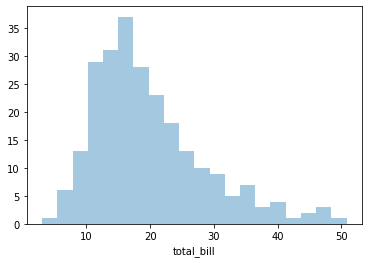

In [8]:
# Removing the kde (kernel density estimation):
sns.distplot(tips['total_bill'], kde = False, bins = 20)

## Jointplot

ointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

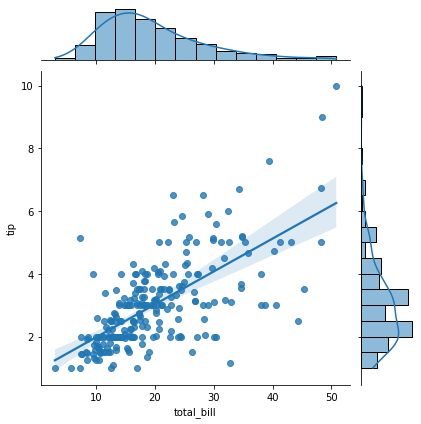

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## Pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

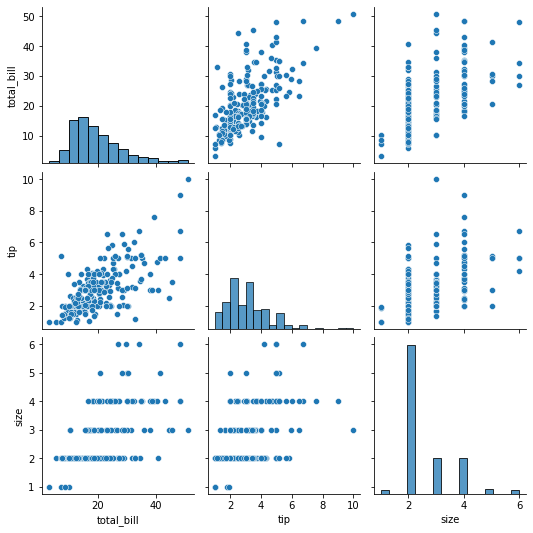

In [13]:
sns.pairplot(tips)

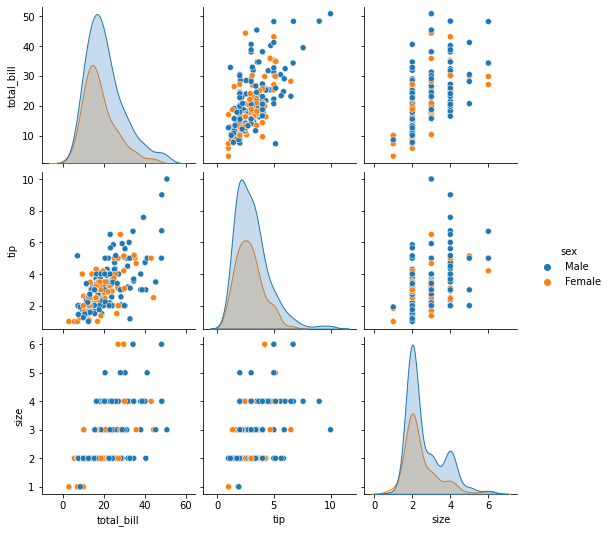

In [15]:
sns.pairplot(tips, hue = "sex")

# Categorical plots

## barplot

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

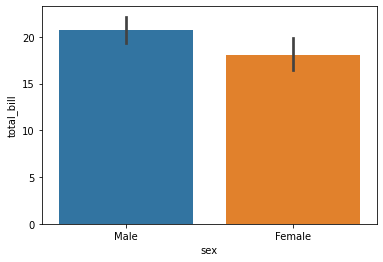

In [18]:
# By debault it plots the mean
sns.barplot(x = 'sex',y='total_bill',data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

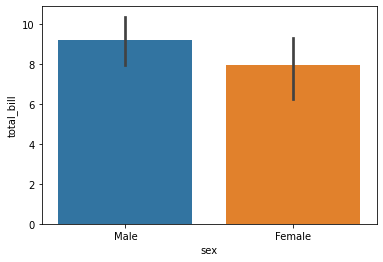

In [20]:
# We can change the estimator parameter to your own function
sns.barplot(x = 'sex',y='total_bill',data=tips, estimator = np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

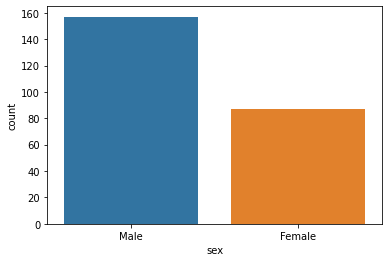

In [21]:
# barplot with the count operation
sns.countplot(x='sex',data=tips)

## Boxplot ❤❤❤

<AxesSubplot:xlabel='day', ylabel='total_bill'>

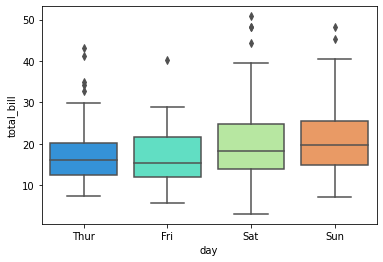

In [22]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

<AxesSubplot:>

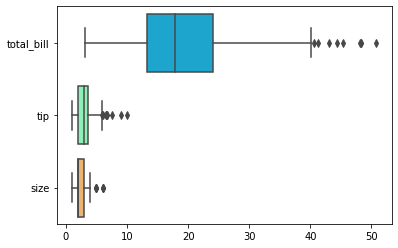

In [23]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

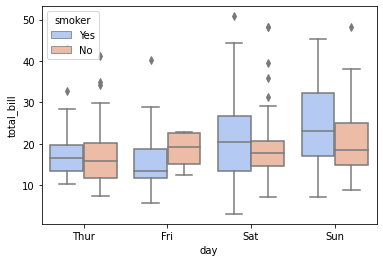

In [24]:
# Splitting by a categorical variable
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

## Violin plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

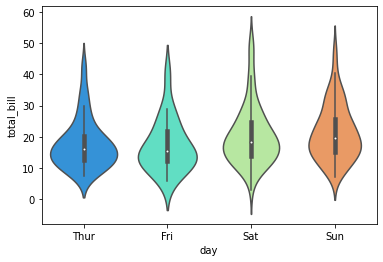

In [25]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

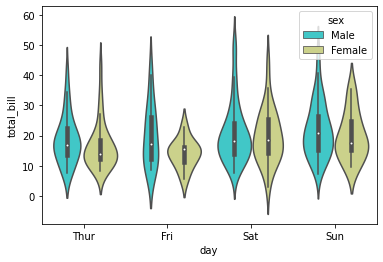

In [27]:
sns.violinplot(x="day", y="total_bill", hue = "sex", data=tips,palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

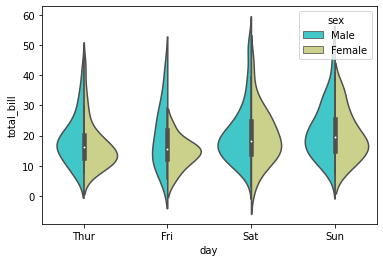

In [28]:
sns.violinplot(x="day", y="total_bill", hue = "sex", split=True, data=tips, palette='rainbow')

## factorplot

factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type.

c:\users\dti digital\desktop\studies\datasciencecourse\env\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


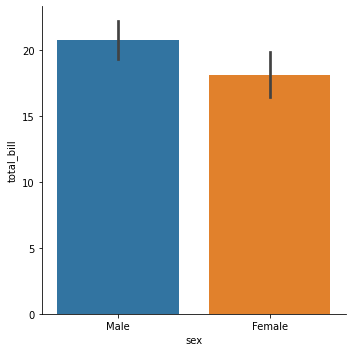

In [29]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

# Matriz plots (heatmap)

To display this kind of graphics the data have to be formatted as a matrix

In [34]:
tc = tips.corr()

<AxesSubplot:>

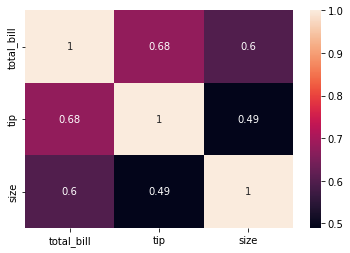

In [35]:
sns.heatmap(tips.corr(), annot=True)

In [36]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [38]:
pv = flights.pivot_table(values='passengers',index='month',columns='year')
pv.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

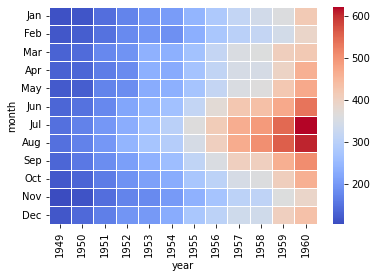

In [42]:
sns.heatmap(pv, cmap='coolwarm', linecolor='white',linewidths=1)

## clustermap

Use hierarchal clustering to produce cluster

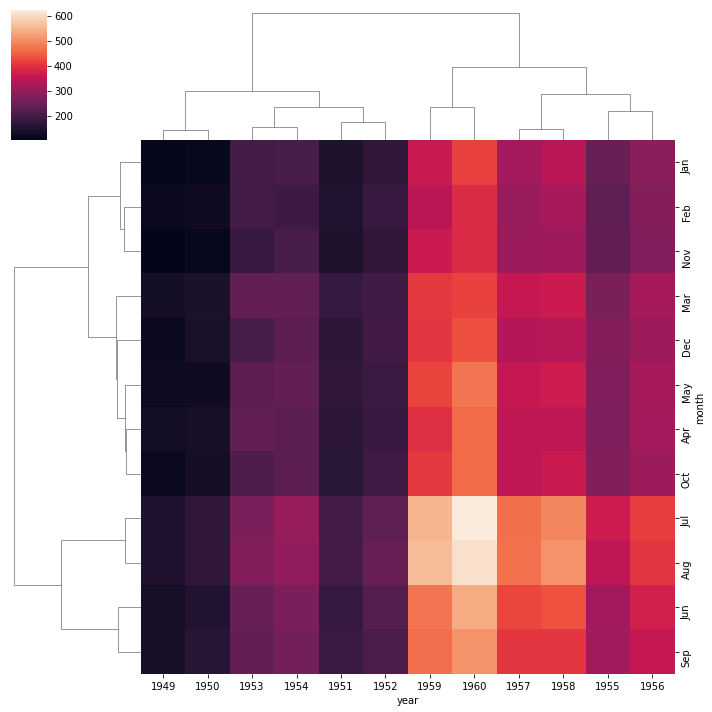

In [45]:
sns.clustermap(pv)

# Grids

In [46]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


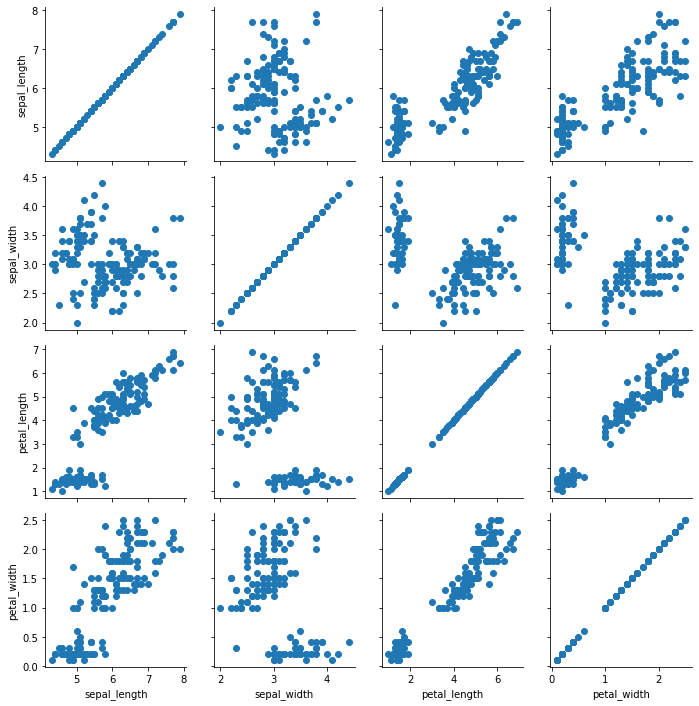

In [50]:
# Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.
g = sns.PairGrid(iris)
g.map(plt.scatter)

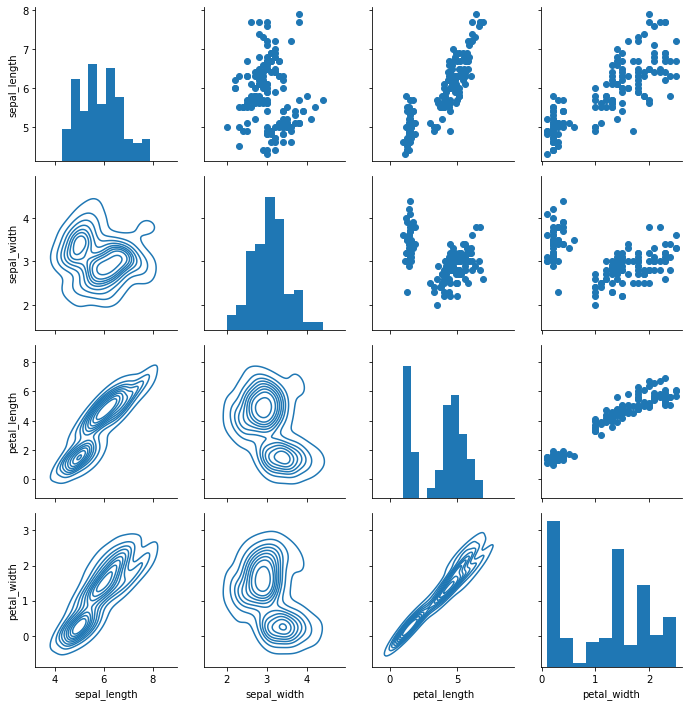

In [51]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## Facet grid

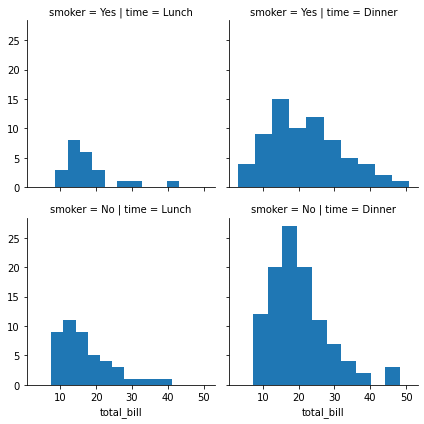

In [52]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

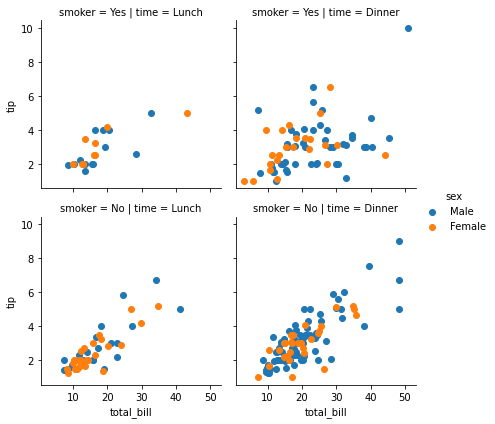

In [58]:
g = sns.FacetGrid(tips, col="time",  row="smoker",  hue ="sex")
g = g.map(plt.scatter, 'total_bill', 'tip' ).add_legend()

c:\users\dti digital\desktop\studies\datasciencecourse\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dti digital\desktop\studies\datasciencecourse\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dti digital\desktop\studies\datasciencecourse\env\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to 

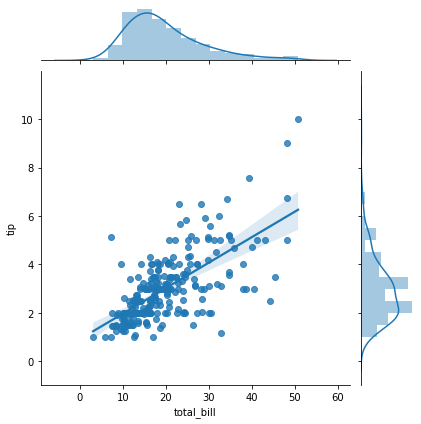

In [59]:

g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)